In [5]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data =data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
68,48,59
161,79,83
180,97,32
151,78,88
156,78,1


In [7]:
data = data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})
data.sample(5)

,Income,Score
157,78,78
171,87,75
187,101,68
175,88,86
44,39,28


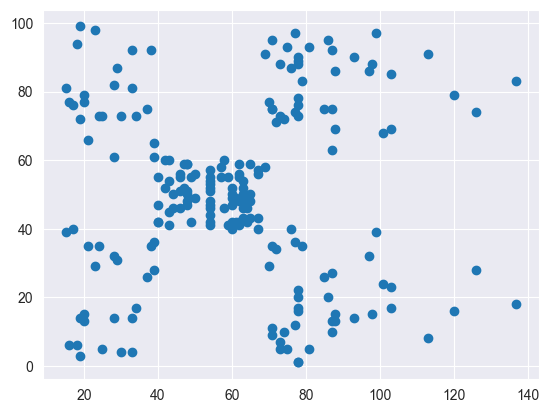

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data['Income'],data['Score'])

In [10]:
from sklearn.cluster import KMeans

k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []

for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['Income','Score']])
    wcss_error.append(model.inertia_)

In [11]:
wcss_error

[269981.28,
 183116.42954636694,
 132087.72428243398,
 73679.78903948833,
 44454.47647967974,
 38831.146380835475,
 31599.131394611137,
 30087.955077311413,
 21996.523372372307,
 19657.78360870396]

Text(0, 0.5, 'WCSS')

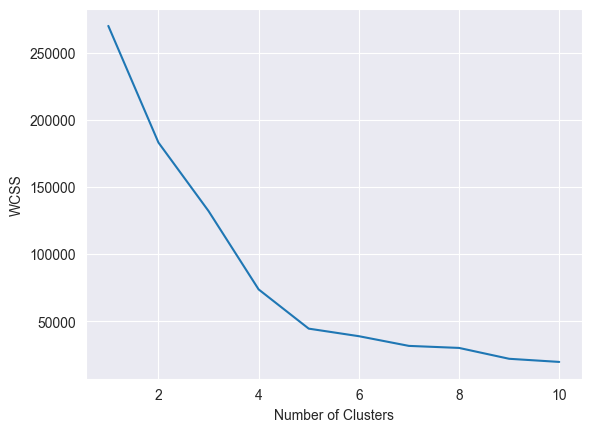

In [12]:
plt.plot(k_values,wcss_error)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [14]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [15]:
data['Cluster'] = pred
data.head()

,Income,Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [16]:
C1 = data[data['Cluster']==0]
C2 = data[data['Cluster']==1]
C3 = data[data['Cluster']==2]
C4 = data[data['Cluster']==3]
C5 = data[data['Cluster']==4]

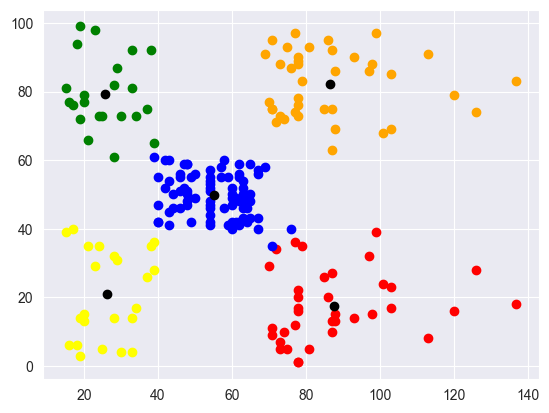

In [20]:
plt.scatter(C1['Income'],C1['Score'],color='red')
plt.scatter(C2['Income'],C2['Score'],color='blue')
plt.scatter(C3['Income'],C3['Score'],color='orange')
plt.scatter(C4['Income'],C4['Score'],color='green')
plt.scatter(C5['Income'],C5['Score'],color='yellow')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [ ]:
model.cluster_centers_